<a href="https://colab.research.google.com/github/grace1996-beep/r_week_13/blob/main/CUSTOMER_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CUSTOMER BEHAVIOUR ANALYSIS IN R

#Defining the reserch question
1. To perform analysis on customer behaviour

# Defining the metrics of success
1. Loading the dataset

2. Performing data cleaning

3. Performing Bivariate Analysis

4. Performing univariarte Analysis

5. Providing recomendations

6. performing supervised learning

In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
library(ggplot2) 
library(tidyverse)

In [ ]:
%%R
install.packages("tidyverse")
install.packages("funModeling")
install.packages("Hmisc")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/tidyverse_1.3.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 702779 bytes (686 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wr

In [ ]:
%%R
library(funModeling) 
library(tidyverse) 
library(Hmisc)

R[write to console]: Loading required package: Hmisc

R[write to console]: Loading required package: lattice

R[write to console]: Loading required package: survival

R[write to console]: Loading required package: Formula

R[write to console]: 
Attaching package: ‘Hmisc’


R[write to console]: The following objects are masked from ‘package:dplyr’:

    src, summarize


R[write to console]: The following objects are masked from ‘package:base’:

    format.pval, units


R[write to console]: funModeling v.1.9.4 :)
Examples and tutorials at livebook.datascienceheroes.com
 / Now in Spanish: librovivodecienciadedatos.ai



**loading dataset**

In [ ]:
%%R
df <- read.csv("http://bit.ly/EcommerceCustomersDataset")
head(df)


  Administrative Administrative_Duration Informational Informational_Duration
1              0                       0             0                      0
2              0                       0             0                      0
3              0                      -1             0                     -1
4              0                       0             0                      0
5              0                       0             0                      0
6              0                       0             0                      0
  ProductRelated ProductRelated_Duration BounceRates ExitRates PageValues
1              1                0.000000  0.20000000 0.2000000          0
2              2               64.000000  0.00000000 0.1000000          0
3              1               -1.000000  0.20000000 0.2000000          0
4              2                2.666667  0.05000000 0.1400000          0
5             10              627.500000  0.02000000 0.0500000          0
6         

# Previewing the dataset

In [ ]:
#checking for the number of columns in the dataset
%%R
ncol(df)

[1] 18


In [ ]:
#summary of df
%%R
summary(df)

 Administrative   Administrative_Duration Informational   
 Min.   : 0.000   Min.   :  -1.00         Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.000  
 Median : 1.000   Median :   8.00         Median : 0.000  
 Mean   : 2.318   Mean   :  80.91         Mean   : 0.504  
 3rd Qu.: 4.000   3rd Qu.:  93.50         3rd Qu.: 0.000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.000  
 NA's   :14       NA's   :14              NA's   :14      
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  185.0        
 Median :   0.00        Median : 18.00   Median :  599.8        
 Mean   :  34.51        Mean   : 31.76   Mean   : 1196.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1466.5        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
 NA's   :14             NA's   :14       NA's   :14             
  Bounce

In [ ]:
#checking for the shape 
%%R
dim(df)

[1] 12330    18


# Data cleaning

In [ ]:
##Checking for null values
%%R
sum(is.na(df))

[1] 112


In [ ]:
#removing null values
%%R
df1 <- na.omit(df)
dim(df1)
sum(is.na(df1))

[1] 0


In [ ]:
#checking for duplicates
%%R
sum(duplicated(df1))
#removing duplicates
df2 <- unique(df1)
sum(duplicated(df2))
dim(df2)



[1] 12199    18


In [ ]:
#checking for outliers
%%R
boxplot.stats(df2$BounceRates)$out

   [1] 0.20000000 0.20000000 0.05000000 0.20000000 0.20000000 0.20000000
   [7] 0.20000000 0.20000000 0.05000000 0.04347826 0.06666667 0.20000000
  [13] 0.20000000 0.05000000 0.20000000 0.20000000 0.05000000 0.20000000
  [19] 0.20000000 0.20000000 0.20000000 0.20000000 0.20000000 0.20000000
  [25] 0.20000000 0.05714286 0.20000000 0.05000000 0.15000000 0.04444444
  [31] 0.05000000 0.05000000 0.20000000 0.20000000 0.20000000 0.13333333
  [37] 0.20000000 0.05000000 0.20000000 0.20000000 0.06666667 0.20000000
  [43] 0.10000000 0.20000000 0.20000000 0.08666667 0.06666667 0.20000000
  [49] 0.20000000 0.20000000 0.20000000 0.08000000 0.10000000 0.20000000
  [55] 0.08000000 0.20000000 0.20000000 0.20000000 0.20000000 0.20000000
  [61] 0.20000000 0.05000000 0.20000000 0.20000000 0.10000000 0.20000000
  [67] 0.20000000 0.20000000 0.06666667 0.06666667 0.20000000 0.05714286
  [73] 0.20000000 0.20000000 0.20000000 0.20000000 0.07500000 0.20000000
  [79] 0.20000000 0.07777778 0.06666667 0.20000000 

In [ ]:
%%R
outliers <- boxplot(df2$BounceRates, plot=FALSE)$out

In [ ]:
%%R
x<-df2 
xl <- x[-which(x$BounceRates %in% outliers),]
head(xl)

   Administrative Administrative_Duration Informational Informational_Duration
2               0                       0             0                      0
5               0                       0             0                      0
6               0                       0             0                      0
9               0                       0             0                      0
10              0                       0             0                      0
11              0                       0             0                      0
   ProductRelated ProductRelated_Duration BounceRates  ExitRates PageValues
2               2                 64.0000  0.00000000 0.10000000          0
5              10                627.5000  0.02000000 0.05000000          0
6              19                154.2167  0.01578947 0.02456140          0
9               2                 37.0000  0.00000000 0.10000000          0
10              3                738.0000  0.00000000 0.02222222   

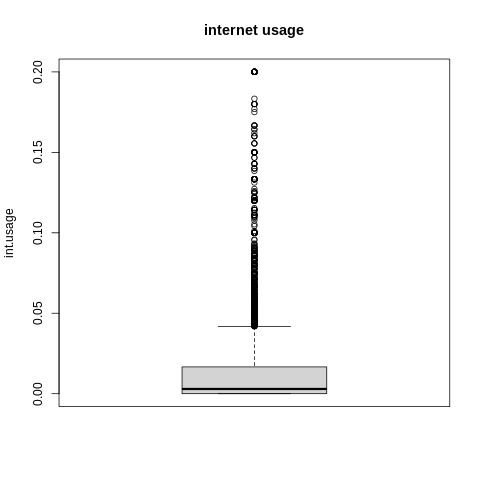

In [ ]:
%%R
boxplot(df2$BounceRates,
  ylab = "int.usage",main="internet usage"
)
#before removing outliers

In [ ]:
%%R
#shape after removal of outliers
dim(xl)

[1] 10768    18


# Univariate analysis

**measures of central tendancy**

In [ ]:
%%R
df3=xl
#finding the mean of bounce rates
bounce.mean <- mean(df3$BounceRates)
bounce.mean



[1] 0.00644852


In [ ]:
%%R
head(df3)

   Administrative Administrative_Duration Informational Informational_Duration
2               0                       0             0                      0
5               0                       0             0                      0
6               0                       0             0                      0
9               0                       0             0                      0
10              0                       0             0                      0
11              0                       0             0                      0
   ProductRelated ProductRelated_Duration BounceRates  ExitRates PageValues
2               2                 64.0000  0.00000000 0.10000000          0
5              10                627.5000  0.02000000 0.05000000          0
6              19                154.2167  0.01578947 0.02456140          0
9               2                 37.0000  0.00000000 0.10000000          0
10              3                738.0000  0.00000000 0.02222222   

In [ ]:
%%R
#Finding the median
exit.median <- median(df3$ExitRates)
exit.median

[1] 0.02222222


**Measures of dispersion**

In [ ]:
%%R
#Finding the minimum element of product related duration
dur.min <- min(df3$ProductRelated_Duration)
dur.min

[1] -1


In [ ]:
%%R
#Finding the maximum element of product related duration
dur.max <- max(df3$ProductRelated_Duration)
dur.max


[1] 63973.52


In [ ]:
%%R
#Finding range
dur.range <- range(df3$ProductRelated_Duration)
dur.range

[1]    -1.00 63973.52


In [ ]:
%%R
#checking the interquatile range of exit rates
exit <- quantile(df3$ExitRates)
exit

        0%        25%        50%        75%       100% 
0.00000000 0.01276403 0.02222222 0.03730521 0.20000000 


In [ ]:
%%R
#Calculating exitrates variance
variance <- var(df3$ExitRates)
variance

[1] 0.0004723764


In [ ]:
%%R
#Standard Deviation
std <- sd(df3$ExitRates)
std

[1] 0.02173422


In [ ]:
%%R
#Skewness
install.packages("moments")
library(moments)
skewness(df3$ExitRates)


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/moments_0.14.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 7650 bytes

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console

[1] 1.727093


In [ ]:
%%R
#Kurtosis
data <- df3$ExitRates
kurtosis(data)

[1] 7.759255


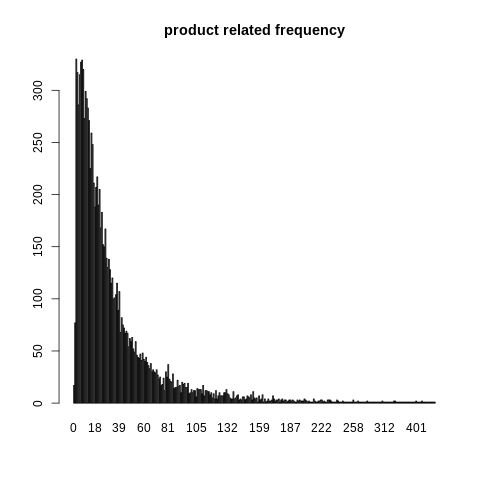

In [ ]:
%%R
#Product related frequency Bar Graph
product <- df3$ProductRelated
#Applying the table() function will compute the frequency distribution 
pro_frequency <- table(product)
barplot(pro_frequency,main="product related frequency")

   Month frequency percentage cumulative_perc
1    May      2800      26.00           26.00
2    Nov      2715      25.21           51.21
3    Mar      1676      15.56           66.77
4    Dec      1545      14.35           81.12
5    Oct       512       4.75           85.87
6    Sep       416       3.86           89.73
7    Aug       383       3.56           93.29
8    Jul       367       3.41           96.70
9   June       222       2.06           98.76
10   Feb       132       1.23          100.00

        VisitorType frequency percentage cumulative_perc
1 Returning_Visitor      9042      83.97           83.97
2       New_Visitor      1658      15.40           99.37
3             Other        68       0.63          100.00

[1] "Variables processed: Month, VisitorType"


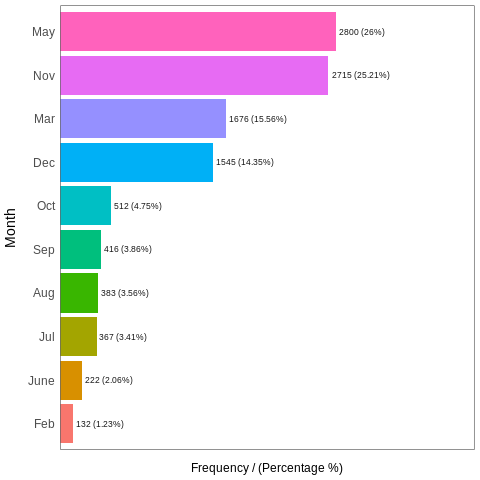

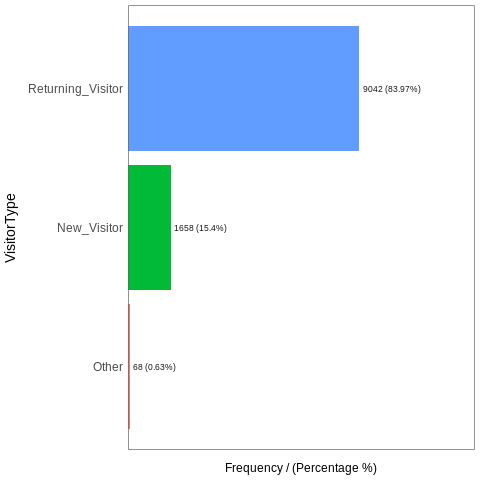

In [ ]:
#using freq function to run character variables
%%R
freq(df3)

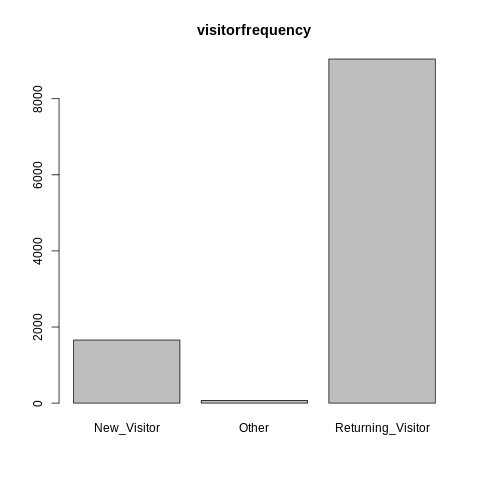

In [ ]:
%%R
#Visitor Frequency Bar Graph
visitor <- df3$VisitorType
#Applying the table() function will compute the frequency distribution of visitor
visitor_frequency <- table(visitor)
barplot(visitor_frequency,main="visitorfrequency")

returning visitors are more prone to make transactions

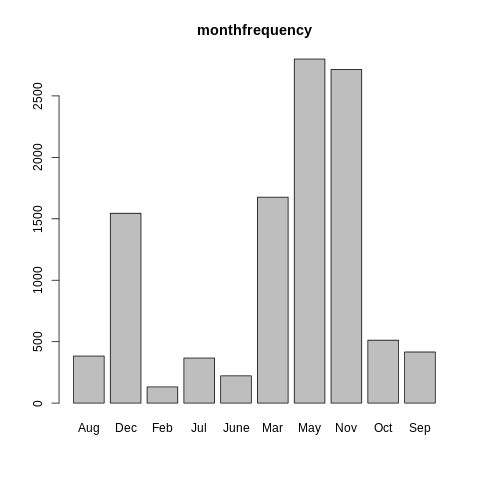

In [ ]:
%%R
#Month Frequency Bar Graph
month <- df3$Month
#Applying the table() function will compute the frequency distribution of months
month_frequency <- table(month)
barplot(month_frequency,main="monthfrequency")

Incoperating more marketing could lead to more sales in the months of may and november

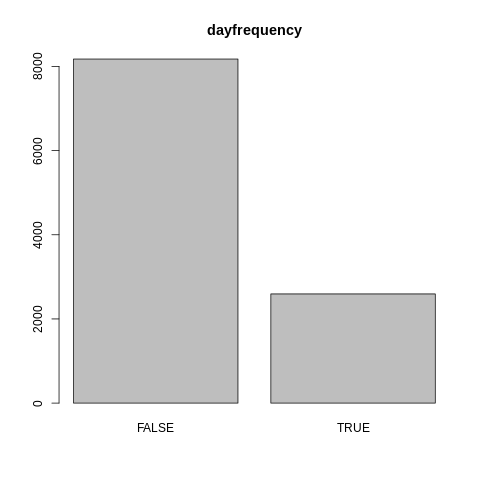

In [ ]:
%%R
#Day Frequency Bar Graph
day <- df3$Weekend
#Applying the table() function will compute the frequency distribution of day 
day_frequency <- table(day)
barplot(day_frequency,main="dayfrequency")

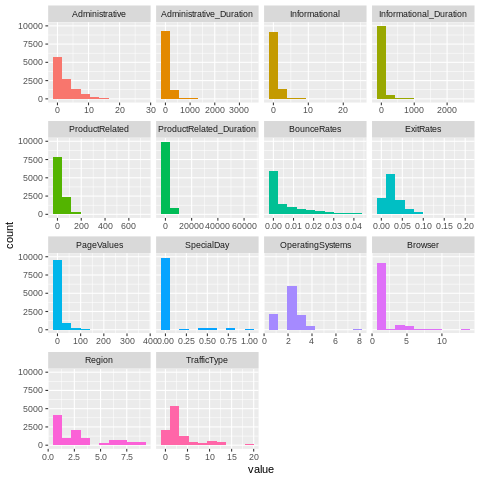

In [ ]:
#plotting numerical values
%%R
plot_num(df3)

most of the transactions can mostly happen during the weekdays

# Bivariate analysis

In [ ]:
%%R
#covariance
pro <- df3$ProductRelated
# 
# ---
# 
produration <- df3$ProductRelated_Duration
cov(pro,produration)

[1] 79147.06


theres a positive covariance between the two variables

In [ ]:
%%R
#covariance
pro <- df3$ProductRelated
# 
# ---
# 
produration <- df3$ProductRelated_Duration
cor(pro,produration)

[1] 0.8557568


theres a linear relationship between the two variables

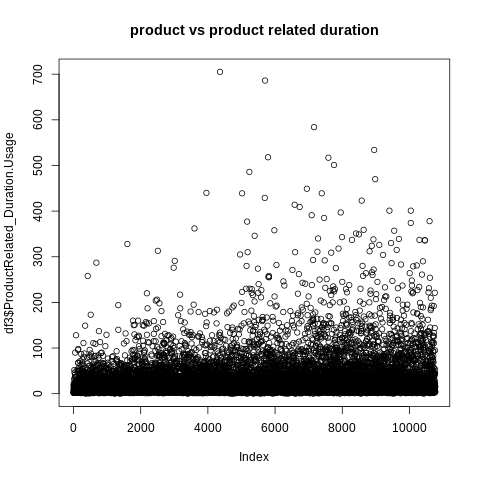

In [ ]:
%%R
#plotting product vs product related duration
plot(df3$ProductRelated,df3$ProductRelated_Duration.Usage,main="product vs product related duration")


there is arelationship between the two

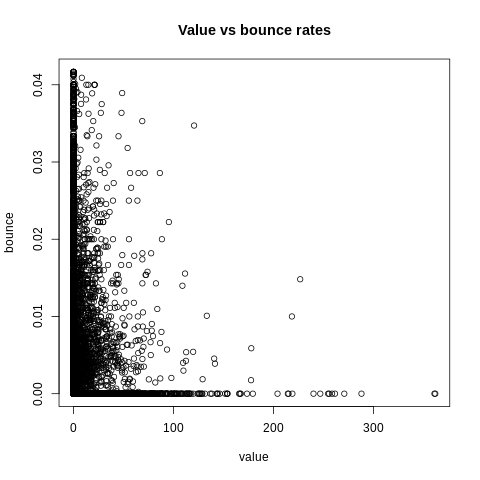

In [ ]:
%%R
value <- df3$PageValues 
bounce <- df3$ BounceRates
plot(value, bounce, xlab="value", ylab="bounce",main="Value vs bounce rates")


# Hierachical clustering
**Advantages of hierachical clustering**
1. it is easy to understand and implement
2. The dendrogram output of the algorithm can be used to understand the big picture as well as the groups in your data.

**Disadvantages of hierachical clustering**
Sensitivity to noise and outliers

In [ ]:
%%R
str(df3)

'data.frame':	10768 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Administrative_Duration: num  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ProductRelated         : int  2 10 19 2 3 3 16 7 6 2 ...
 $ ProductRelated_Duration: num  64 628 154 37 738 ...
 $ BounceRates            : num  0 0.02 0.0158 0 0 ...
 $ ExitRates              : num  0.1 0.05 0.0246 0.1 0.0222 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0.8 0.4 0 0.4 0 0 0 ...
 $ Month                  : chr  "Feb" "Feb" "Feb" "Feb" ...
 $ OperatingSystems       : int  2 3 2 2 2 1 1 1 2 3 ...
 $ Browser                : int  2 3 2 2 4 1 1 1 5 2 ...
 $ Region                 : int  1 1 1 2 1 3 4 1 1 3 ...
 $ TrafficType            : int  2 4 3 3 2 3 3 3 3 3 ...
 $ VisitorType            : chr  "Returning_Visitor" "Returning_Visitor" "Returning_Vi

In [ ]:
#DRopping some of the columns
%%R

drop <- c("Administrative","Revenue","Weekend","VisitorType","TrafficType","Region"," Browser","OperatingSystems","OperatingSystems"," ProductRelated ","Informational ")
df4 = df3[,!(names(df3) %in% drop)]

In [ ]:
%%R
head(df4)
drop <- c("Month")
dff = df4[,!(names(df4)%in% drop)]
head(dff)

   Administrative_Duration Informational Informational_Duration ProductRelated
2                        0             0                      0              2
5                        0             0                      0             10
6                        0             0                      0             19
9                        0             0                      0              2
10                       0             0                      0              3
11                       0             0                      0              3
   ProductRelated_Duration BounceRates  ExitRates PageValues SpecialDay Browser
2                  64.0000  0.00000000 0.10000000          0        0.0       2
5                 627.5000  0.02000000 0.05000000          0        0.0       3
6                 154.2167  0.01578947 0.02456140          0        0.0       2
9                  37.0000  0.00000000 0.10000000          0        0.8       2
10                738.0000  0.00000000 0.022222

In [ ]:
# scalling the dataset to be used for clustering
%%R
df <- scale(dff)
head(dff)

   Administrative_Duration Informational Informational_Duration ProductRelated
2                        0             0                      0              2
5                        0             0                      0             10
6                        0             0                      0             19
9                        0             0                      0              2
10                       0             0                      0              3
11                       0             0                      0              3
   ProductRelated_Duration BounceRates  ExitRates PageValues SpecialDay Browser
2                  64.0000  0.00000000 0.10000000          0        0.0       2
5                 627.5000  0.02000000 0.05000000          0        0.0       3
6                 154.2167  0.01578947 0.02456140          0        0.0       2
9                  37.0000  0.00000000 0.10000000          0        0.8       2
10                738.0000  0.00000000 0.022222

In [ ]:
%%R
# i now use the R function hclust() for hierarchical clustering
# ---
# 

# First i use the dist() function to compute the Euclidean distance between observations, 
# d will be the first argument in the hclust() function dissimilarity matrix
# ---
#
d <- dist(dff, method = "euclidean")

# i then hierarchical clustering using the Ward's method
# ---
# 
res.hc <- hclust(d, method = "ward.D2" )

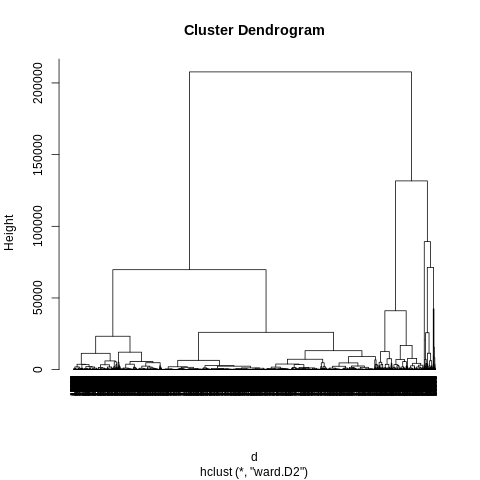

In [ ]:
%%R
# Lastly, i plot the obtained dendrogram
# ---
# 
plot(res.hc, cex = 0.6, hang = -1)

# KMEANS CLUSTERING
**Advantages of k means clustering**
1. Generalizes to clusters of different shapes and sizes, such as elliptical clusters.
**disadvantage**
1.  k-means can only handle numerical data

Question: Perform clustering analysis on the following dataset using the K-Means clustering algorithm.

In [ ]:
%%R
drop <- c("Administrative","Weekend","VisitorType","TrafficType","Region"," Browser","OperatingSystems","OperatingSystems"," ProductRelated ","Informational ")
df5 = df3[,!(names(df3) %in% drop)]
head(df5)

   Administrative_Duration Informational Informational_Duration ProductRelated
2                        0             0                      0              2
5                        0             0                      0             10
6                        0             0                      0             19
9                        0             0                      0              2
10                       0             0                      0              3
11                       0             0                      0              3
   ProductRelated_Duration BounceRates  ExitRates PageValues SpecialDay Month
2                  64.0000  0.00000000 0.10000000          0        0.0   Feb
5                 627.5000  0.02000000 0.05000000          0        0.0   Feb
6                 154.2167  0.01578947 0.02456140          0        0.0   Feb
9                  37.0000  0.00000000 0.10000000          0        0.8   Feb
10                738.0000  0.00000000 0.02222222        

In [ ]:
%%R
#Preprocessing the dataset
# ---
# Since clustering is a type of Unsupervised Learning, 
# i would not require Class Label(output) during execution of our algorithm. 
#
# 
# ---
#
final<- df5[, c(1, 2, 3, 4,5,6,7,8,9,11)]
final.class<- df3[, "Weekend"]
head(final)

   Administrative_Duration Informational Informational_Duration ProductRelated
2                        0             0                      0              2
5                        0             0                      0             10
6                        0             0                      0             19
9                        0             0                      0              2
10                       0             0                      0              3
11                       0             0                      0              3
   ProductRelated_Duration BounceRates  ExitRates PageValues SpecialDay Browser
2                  64.0000  0.00000000 0.10000000          0        0.0       2
5                 627.5000  0.02000000 0.05000000          0        0.0       3
6                 154.2167  0.01578947 0.02456140          0        0.0       2
9                  37.0000  0.00000000 0.10000000          0        0.8       2
10                738.0000  0.00000000 0.022222

In [ ]:
%%R
# Previewing the class column
# ---
# 
head(final.class)

[1] FALSE  TRUE FALSE FALSE FALSE FALSE


In [ ]:
%%R
# Normalizing the dataset so that no particular attribute 
# has more impact on clustering algorithm than others.
# ---
# 
normalize <- function(x){
  return ((x-min(x)) / (max(x)-min(x)))
}

final$Administrative_Duration<- normalize(final$Administrative_Duration)
final$Informational<- normalize(final$Informational)
final$Informational_Duration<- normalize(final$Informational_Duration)
final$ProductRelated<- normalize(final$ProductRelated)
final$ProductRelated_Duration<- normalize(final$ProductRelated_Duration)
final$BounceRates  <- normalize(final$BounceRates)
final$ExitRates  <- normalize(final$ExitRates)
final$PageValues  <- normalize(final$PageValues)

final$SpecialDay  <- normalize(final$SpecialDay)
final$ Browser  <- normalize(final$ Browser)

head(final)

   Administrative_Duration Informational Informational_Duration ProductRelated
2             0.0002941393             0           0.0003920992    0.002836879
5             0.0002941393             0           0.0003920992    0.014184397
6             0.0002941393             0           0.0003920992    0.026950355
9             0.0002941393             0           0.0003920992    0.002836879
10            0.0002941393             0           0.0003920992    0.004255319
11            0.0002941393             0           0.0003920992    0.004255319
   ProductRelated_Duration BounceRates ExitRates PageValues SpecialDay
2             0.0010160295   0.0000000 0.5000000          0        0.0
5             0.0098242234   0.4800000 0.2500000          0        0.0
6             0.0024262263   0.3789474 0.1228070          0        0.0
9             0.0005939865   0.0000000 0.5000000          0        0.8
10            0.0115514735   0.0000000 0.1111111          0        0.4
11            0.00618

In [ ]:
%%R
# Applying the K-means clustering algorithm with no. of centroids(k)=3
# ---
# 
result<- kmeans(final,3)

In [ ]:
%%R
# Previewing the no. of records in each cluster
# 
result$size 

[1] 8100  752 1916


In [ ]:
%%R
# Getting the value of cluster center datapoint value(3 centers for k=3)
# ---
# 
result$centers 

  Administrative_Duration Informational Informational_Duration ProductRelated
1              0.02937642    0.02458848             0.01620063     0.05311076
2              0.01453612    0.01701020             0.01193798     0.04905877
3              0.02186743    0.02152923             0.01433596     0.03796695
  ProductRelated_Duration BounceRates ExitRates  PageValues  SpecialDay
1              0.02204286  0.05396982 0.1165310 0.021688277 0.002469136
2              0.01889179  0.20106788 0.1736307 0.007599440 0.691755319
3              0.01691031  0.56270634 0.2247297 0.009208272 0.019102296
    Browser
1 0.1159259
2 0.1216755
3 0.1035578


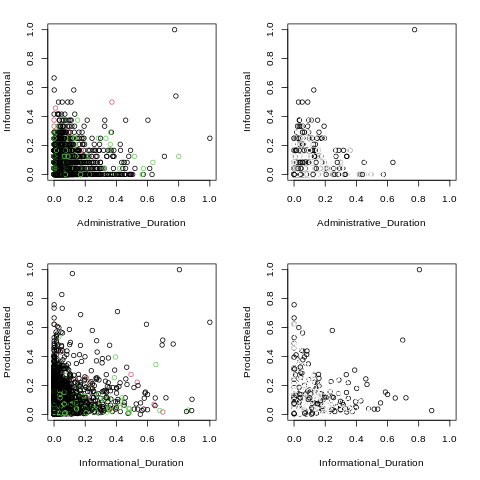

In [ ]:
%%R
# Verifying the results of clustering
# ---
# 
par(mfrow = c(2,2), mar = c(5,4,2,2))


plot(final[c(1,2)], col = result$cluster)

# ---
#
plot(final[c(1,2)], col = final.class)
# Plotting to see how points have been distributed in clusters
# ---
# 
plot(final[c(3,4)], col = result$cluster)
plot(final[c(3,4)], col = final.class)


Result of table shows that Cluster 1 corresponds to false,
Cluster 2 corresponds to true.

In [ ]:
%%R

# 
table(result$cluster, final.class)

   final.class
    FALSE TRUE
  1  6079 2021
  2   624  128
  3  1471  445


# Recommendations
1. returning visitors are more prone to make transactions
2. Incoperating more marketing could lead to more sales in the months of may and november
3. most of the transactions can mostly happen during the weekdays


# Follow up Questions
1. Did I have the right data?
Yes the data was right for my analysis.
2. Did we need other data?
No
3. Did I the right objective
Yes, I was able to achieve my objective
